# Numerisk derivasjon

For en skalar funksjon $f = f(x)$ husker vi at definisjonen av den deriverte $f'$ i punktet $x$ er
$$ f'(x) \doteq \lim_\limits{h\to0}\frac{f(x+h)-f(x)}{h}.$$
Dersom denne grensen eksisterer kan vi for eksempel ta $h = 1/n$ for $n = 1, 2, 3,\dots$, og definere
$$ g_n \doteq n\left( f(x+1/n) - f(x) \right) \ \substack{n \to \infty \\ \longrightarrow} \ f'(x).$$
Merk at i denne prosedyren må vi gjennom "uendelig mange steg" for å få grenseverdien, nettopp fordi vi må la $n \to \infty$.

I en numerisk beregning med en datamaskin vil vi derimot bare være i stand til å utføre endelig mange operasjoner.
Dermed, dersom vi vil beregne deriverte på denne måten .... ta en stor verdi for $n$ og la den tilhørende $g_n$ være vår tilnærming av $f'(x)$.

## Differansemetoder
Basert på idéen ovenfor har vi det som kalles *endelige differansemetoder* for å tilnærme deriverte av en funksjon $f$ i punktet $x$.
For $h > 0$ kan vi definere en *foroverdifferanse*
$$ \frac{f(x+h)-f(x)}{h}, $$
og en *bakoverdifferanse*
$$ \frac{f(x)-f(x-h)}{h}. $$
Vi kan også ta gjennomsnittet av dem og få det som kalles *sentraldifferanse*,
$$ \frac{f(x+h)-f(x-h)}{2h}. $$

Man kan vise at for en to ganger kontinuerlig deriverbar funksjon $f$ vil feilen $|f'(x)-\Delta_h f(x)|$ vi gjør ved å tilnærme $f'(x)$ med en av disse differansene, som vi her kaller $\Delta_h f(x)$, avta lineært for forover- og bakoverdifferanser, og kvadratisk for sentraldifferansen.


---
**Eksempel 1**:
La oss se på funksjonen $f(x) = e^{x}$ for en gitt verdi $x$, og de tilsvarende differansene for $h = 1/n$, hvor $n = 1,\dots,20$.

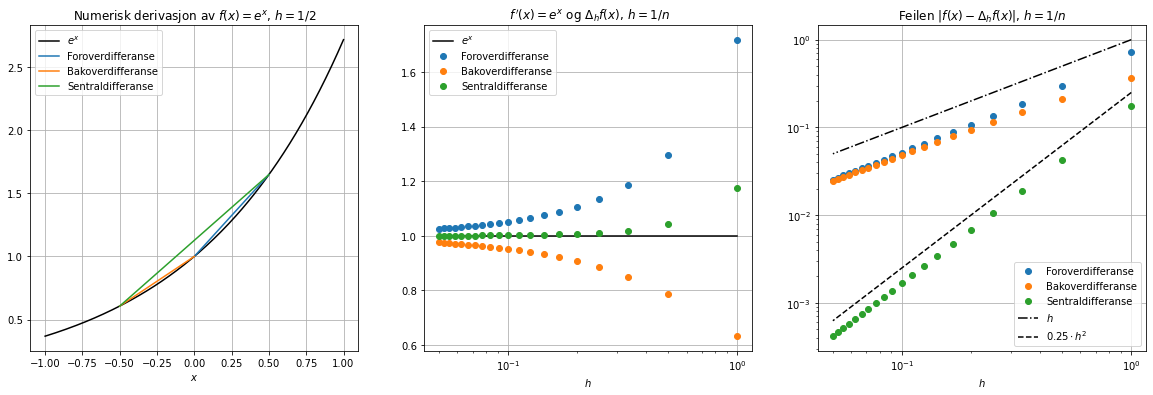

In [203]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = 0 # punktet vi vil finne den deriverte
N = 20 # antall verdier av h = 1/n, n = 1,...,N

g = np.zeros([N,3]) # matrise for differansene
H = np.array([1/n for n in range(1,N+1)]) # verdier av h

for n in range(0,N):
    h = H[n] #1/(n+1)
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)

xs = np.linspace(x-1,x+1,201)

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.plot(xs,np.exp(xs),'k')
ax1.plot([x,x+0.5],[np.exp(x),np.exp(x+0.5)])
ax1.plot([x-0.5,x],[np.exp(x-0.5),np.exp(x)])
ax1.plot([x-0.5,x+0.5],[np.exp(x-0.5),np.exp(x+0.5)])
ax1.grid(True)
ax1.set_xlabel('$x$')
ax1.legend(['$e^x$','Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax1.set_title('Numerisk derivasjon av $f(x) = e^x$, $h = 1/2$')

ax2.semilogx(H,np.exp(x)*np.ones(N),'k') # plott med logaritmisk skalert x-akse
ax2.semilogx(H,g,'o')
ax2.set_xlabel('$h$')
ax2.legend(['$e^x$','Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax2.set_title(' $f\'(x) = e^x$ og $\Delta_h f(x)$, $h = 1/n$')
ax2.grid(True)

err = np.abs(g-np.exp(x))

ax3.loglog(H,err,'o')
ax3.loglog(H,H,'k-.')
ax3.loglog(H,0.25*H**2,'k--')
ax3.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse','$h$','$0.25 \cdot h^2$'])
ax3.set_xlabel('$h$')
ax3.set_title('Feilen $|f(x)-\Delta_h f(x)|$, $h = 1/n$')
ax3.grid(True)

I plottet til venstre har vi plottet funksjonen $f(x) = e^x$ sammen med linjestykkene som definerer verdiene til de ulike differansene i punktet $x$ for $h=1/2$;
tilnærmingen av $f'(x)$ er gitt av stigningstallet for hvert linjestykke.
Merk at siden $f'' > 0$ for denne funksjonen er den deriverte $f'$ også økende; dermed vil foroverdifferansen konsekvent overestimere, og bakoverdifferansen vil konsekvent underestimere, $f'(x)$, og dette ser vi i det midterste plottet.
Da er det rimelig at sentraldifferansen, som er et gjennomsnitt av de foregående differansene, gir en bedre tilnærming.

Feilen er plottet til høyre, hvor vi ser at feilen med forover- og bakoverdifferanser er omtrent den samme, og avtar med samme stigningstall som $h$.
Videre ser vi at feilen med sentraldifferanser avtar raskere, som en kvadratisk funksjon av $h$.

> **Logaritmisk skalering**:
Vi ser at $h = 1/n$ blir veldig liten for større verdier av $n$, og det kan være vanskelig å skille punktene i et plott fra hverandre; da kan det være til hjelp å skalere aksene i plottet annerledes.
I det midterste plottet skalerer vi (på vanlig vis) $y$-aksen lineært, men $x$-aksen logaritmisk; det vil si, når vi går én enhet langs $y$-aksen går vi fra $y=k$ til $y=k+1$, men langs $x$-aksen går vi i stedet fra $x = 10^{k}$ til $x = 10^{k+1}$.
I plottet av feilen blir både $x$- og $y$-verdiene veldig små, så vi skalerer begge aksene logaritmisk.
I disse figurene har vi brukt henholdsvis kommandoene $\texttt{pyplot.semilogx}()$ og $\texttt{pyplot.loglog}()$ istedenfor $\texttt{pyplot.plot}()$.

---

### Numerisk ustabilitet
Tidligere har vi sett at vi kan få problemer med avrundingsfeil når vi utfører operasjoner med flyttall på en datamaskin.
Dette er også tilfelle her hvor vi for kontinuerlige $f$ og svært små $h$ vil subtrahere to omtrent like store tall og dele på et veldig lite:
dersom $h$ blir liten nok vil avrundingsfeilen bli dominerende, og vi vil få store avvik.
La oss se på samme eksempel igjen, men denne gangen for $h = 10^{-n}$ for $n = 0,\dots,10$



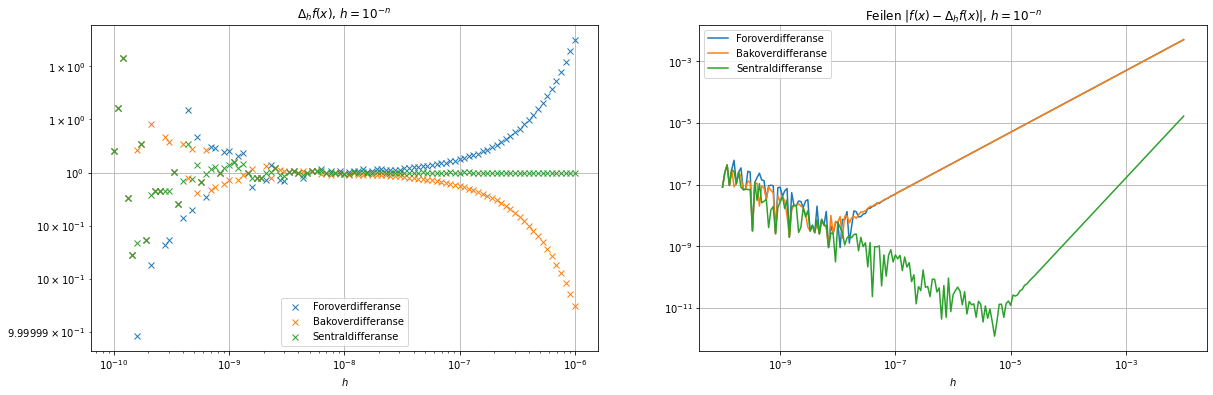

In [225]:
nmin = 2 # minste potens
nmax = 10 # største potens
M = 201

H = np.logspace(-nmin,-nmax,M) # 
g = np.zeros([M,3])

for n in range(0,M):
    h = H[n]
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)
    
err = np.abs(g-np.exp(x))
    
fig2, (ax4,ax5) = plt.subplots(1,2,figsize=(20,6))

ax4.loglog(H[100:],g[100:,:],'x')
ax4.set_xlabel('$h$')
ax4.set_title('$h = 10^{-n}$')
ax4.set_title('$\Delta_h f(x)$, $h = 10^{-n}$')
ax4.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax4.grid(True)

ax5.loglog(H,err)
ax5.set_xlabel('$h$')
ax5.set_title('Feilen $|f(x)-\Delta_h f(x)|$, $h = 10^{-n}$')
ax5.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax5.grid(True)


Legg merke til hvordan feilen avtar med jevn rate helt til $h \approx 10^{-5}$, hvor sentraldifferansen begynner å få problemer.
Forover- og bakover-differansene holder ut litt lenger, til $h \approx 10^{-7}$, før de også gir større feil.

Moralen er at når vi utfører numerisk derivasjon må vi være påpasselige med å ikke ta for små steg $h$ i forhold til flyttallspresisjonen vi opererer med.

## Anvendelse: Estimering av hastighet
Dersom vi deriverer en funksjon $x = x(t)$ som uttrykker posisjonen langs $x$-aksen som funksjon av tid $t$, vil vi som kjent få hastigheten $v = v(t)$ ved tid $t$: $x'(t) = v(t)$.

Gitt en rekke målinger av posisjonen $x$ på tidspunkter $t_n$ har vi $x(t_n)$, ofte $x_n$
$$ \frac{x(t_{n+1})-x(t_n)}{t_{n+1}-t_n} $$

### kanskje ta dette i eget ark?